In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_df=pd.read_csv('/content/drive/My Drive/AI_OF_GOD/train.csv')

In [ ]:
train_df

,FileName,Class
0,1.jpg,0
1,2.jpg,0
2,3.jpg,0
3,4.jpg,0
4,5.jpg,0
...,...,...
8196,8197.jpg,0
8197,8198.jpg,0
8198,8199.jpg,0
8199,8200.jpg,0


In [ ]:
train_df.shape

(8201, 2)

In [ ]:
train_df.Class.value_counts()

0    4829
1    1405
4     789
3     443
6     295
2     285
7      87
5      68
Name: Class, dtype: int64

In [ ]:
df2 = train_df.sample(n=2000, random_state=42)

In [ ]:
import os
import cv2

In [ ]:


# Path to the folder containing images
image_folder = '/content/drive/My Drive/AI_OF_GOD/train/'

# Create empty lists to store image arrays, filenames, and classes
image_arrays = []
filenames = []
classes = []


In [ ]:
# Loop through the DataFrame and read/convert each image
for index, row in df2.iterrows():
    filename = row['FileName']
    class_label = row['Class']
    image_path = os.path.join(image_folder, filename)

    # Read the image using OpenCV
    img = cv2.imread(image_path)

    # Convert BGR to RGB (OpenCV loads images in BGR by default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Append the image array, filename, and class to the respective lists
    image_arrays.append(img)
    filenames.append(filename)
    classes.append(class_label)



In [ ]:
image_arrays = np.array(image_arrays)

In [ ]:
classes=np.array(classes)

In [ ]:
image_arrays.shape

(2000, 227, 227, 3)

In [ ]:
#flattened_images_array = image_arrays.reshape(image_arrays.shape[0], -1)
#df = pd.DataFrame({'names':filenames,'imgs': flattened_images_array.tolist(), 'lables': classes.tolist()})

array([[[173, 173, 173],
        [176, 176, 176],
        [178, 178, 178],
        ...,
        [164, 164, 164],
        [165, 165, 165],
        [167, 167, 167]],

       [[172, 172, 172],
        [175, 175, 175],
        [178, 178, 178],
        ...,
        [164, 164, 164],
        [166, 166, 166],
        [168, 168, 168]],

       [[173, 173, 173],
        [175, 175, 175],
        [179, 179, 179],
        ...,
        [161, 161, 161],
        [164, 164, 164],
        [167, 167, 167]],

       ...,

       [[183, 183, 183],
        [171, 171, 171],
        [130, 130, 130],
        ...,
        [183, 183, 183],
        [195, 195, 195],
        [207, 207, 207]],

       [[160, 160, 160],
        [119, 119, 119],
        [ 89,  89,  89],
        ...,
        [187, 187, 187],
        [200, 200, 200],
        [215, 215, 215]],

       [[125, 125, 125],
        [ 90,  90,  90],
        [ 94,  94,  94],
        ...,
        [188, 188, 188],
        [203, 203, 203],
        [220, 220, 220]]], dtype=uint8)
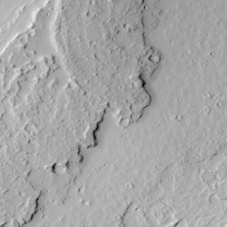

In [ ]:
image_arrays[0]

In [ ]:
min_value = np.min(image_arrays)
max_value = np.max(image_arrays)

print("Min value:", min_value)
print("Max value:", max_value)

Min value: 0
Max value: 255


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Now, normalized_images will contain your normalized images with values between 0 and 1
# It should have a shape of (8201, 227, 227, 3)
# Reshape the array to (num_images, num_pixels)
num_images, height, width, channels = image_arrays.shape
image_arrays_reshaped = image_arrays.reshape(num_images, -1)

In [ ]:
image_arrays_reshaped.shape

(2000, 154587)

In [ ]:
# Create a MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the flattened data
scaler.fit(image_arrays_reshaped)


MinMaxScaler()

In [ ]:
# Transform the data to the range [0, 1]
normalized_images = scaler.transform(image_arrays_reshaped)

In [ ]:

# Reshape the normalized data back to the original shape
normalized_images = normalized_images.reshape(num_images, height, width, channels)

In [ ]:
normalized_images.shape

(2000, 227, 227, 3)

In [ ]:
min1_value = np.min(normalized_images)
max1_value = np.max(normalized_images)

print("Min value:", min1_value)
print("Max value:", max1_value)

Min value: 0.0
Max value: 1.0000000000000002


In [ ]:
X=normalized_images
Y=classes

In [ ]:
X.shape

(2000, 227, 227, 3)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(227, 227, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(input_shape=(227,227,3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 9s 45ms/step - loss: 1.5026 - accuracy: 0.5706
Epoch 2/10
50/50 [==============================] - 2s 47ms/step - loss: 1.2619 - accuracy: 0.6000
Epoch 3/10
50/50 [==============================] - 3s 52ms/step - loss: 1.1709 - accuracy: 0.6044
Epoch 4/10
50/50 [==============================] - 2s 46ms/step - loss: 1.0278 - accuracy: 0.6544
Epoch 5/10
50/50 [==============================] - 2s 46ms/step - loss: 0.9055 - accuracy: 0.7000
Epoch 6/10
50/50 [==============================] - 2s 46ms/step - loss: 0.6831 - accuracy: 0.7800
Epoch 7/10
50/50 [==============================] - 2s 46ms/step - loss: 0.5049 - accuracy: 0.8356
Epoch 8/10
50/50 [==============================] - 2s 50ms/step - loss: 0.3416 - accuracy: 0.8850
Epoch 9/10
50/50 [==============================] - 2s 50ms/step - loss: 0.2492 - accuracy: 0.9194
Epoch 10/10
50/50 [==============================] - 2s 47ms/step - loss: 0.2133 - accuracy: 0.9375


In [ ]:
cnn.evaluate(X_test,Y_test)

13/13 [==============================] - 1s 45ms/step - loss: 1.8535 - accuracy: 0.6525


[1.8535419702529907, 0.6524999737739563]

In [ ]:
df3=pd.read_csv('/content/drive/My Drive/AI_OF_GOD/test.csv')

In [ ]:
test_folder='/content/drive/My Drive/AI_OF_GOD/test/'

In [ ]:
'''for index, row in df3.iterrows():
    filename1 = row['FileName']
    image_path1 = os.path.join(image_folder, filename1)

    # Read the image using OpenCV
    img1 = cv2.imread(image_path1)

    # Convert BGR to RGB (OpenCV loads images in BGR by default)
    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img1=np.array(img)
    img2=img1.reshape(-1)
    img3=scaler.transform(img2)
    img4=img3.reshape(227,227,3)

    # Append the image array, filename, and class to the respective lists
    test_image_arrays.append(img)
    test_filenames.append(filename)
    classes.append(class_label)'''

"for index, row in df3.iterrows():\n    filename1 = row['FileName']\n    image_path1 = os.path.join(image_folder, filename1)\n\n    # Read the image using OpenCV\n    img1 = cv2.imread(image_path1)\n\n    # Convert BGR to RGB (OpenCV loads images in BGR by default)\n    img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    img1=np.array(img)\n    img2=img1.reshape(-1)\n    img3=scaler.transform(img2)\n    img4=img3.reshape(227,227,3)\n\n    # Append the image array, filename, and class to the respective lists\n    test_image_arrays.append(img)\n    test_filenames.append(filename)\n    classes.append(class_label)"